# Capítulo 6 - Ejercicios

### Ejercicio 1

Escriba un programa que lea un archivo de texto plano que contenga 5 números por línea (5 columnas). Calcule el promedio de los 5 números y luego substraiga el promedio a cada una de los 5 números originales. Guarde un nuevo archivo con los valores con el promedio removido (*demeaned*). Permite que el usuario pueda especificar el nombre del archivo de entrada y salida. 

**Nota**: Haga el programa estable, de tal forma que pueda lidiar con cualquier archivo con estas características. 

Por ejemplo, si el archivo de entrada es
```
10 20 30 40 50
1 2 3 4 5
2 4 6 8 10
5 5 5 5 5
```
el programa deberá escribir un nuevo archivo así. 
```
-20.00 -10.00  0.00 10.00 20.00
-2.00 -1.00  0.00  1.00  2.00
-4.00 -2.00  0.00  2.00  4.00
 0.00  0.00  0.00  0.00  0.00
```

In [3]:
# prob_c5_1.py

import numpy as np

fin  = input("Enter input file name ")

fout = input("Enter output file name ")
 
# Load data and extract shape
data = np.loadtxt(fin)
nrow, ncol = data.shape

# Demean data
for i in range(nrow):
   data[i,:] = data[i,:]-np.mean(data[i,:])

# Save data with given format
np.savetxt(fout, data,fmt='%5.2f')


Enter input file name file1.dat
Enter output file name file2.dat


Archivo de entrada
```
10 20 30 40 50
1 2 3 4 5
2 4 6 8 10
5 5 5 5 5
```

Archivo de salida
```
-20.00 -10.00  0.00 10.00 20.00
-2.00 -1.00  0.00  1.00  2.00
-4.00 -2.00  0.00  2.00  4.00
 0.00  0.00  0.00  0.00  0.00
```

### Ejercicio 2

En Geociencias hay múltiples fuentes para obtener información de todo tipo (geofísica, geología, fallas, geoquímica, etc). Una de ellas se llama GEOROC (\url{http://georoc.mpch-mainz.gwdg.de/georoc/}) que contiene información sobre geoquímica de rocas en el mundo. De ahí se extrajo un archivo llamado `ANDEAN_ARC_1.csv`, que contiene una gran cantidad de información, incluyendo latitud y longitud de muestreo y contenido en peso de $SiO_2$ (entre otras muchas variables).

Utilizando su método preferido (por ejemplo con `pandas` o `numpy`), lea el archivo e imprima los primeros 20 líneas con la Latitud, longitud y porcentaje de $SiO_2$ en peso, que los encuentra en las columnas (4, 6, y 27 respectivamente).  

Tenga también en cuenta que algunas variables tienen valores inexistentes, así que dependiendo del método, debe ajustar dichos casos. 

**Ayuda**: Si usa `pandas`, el `DataFrame` se puede convertir a un arreglo de `numpy` con el comando
```
data = data.to_numpy()
```
Tenga también en cuenta que algunas variables tienen valores inexistentes, así que dependiendo del método, debe ajustar dichos casos. 

**Ayuda 2**: También para extraer la primera columna del `DataFrame`
```
x  = np.array(data.iloc[:,0])
```

In [55]:
# prob_c5_2.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fin  = 'ANDEAN_ARC_1.csv'
fmt  = '%9.4f %9.4f %9.4f'

data = pd.read_csv(fin,usecols=[4,6,27])
print('DataFrame ')
print(data)

# Option 1
lat  = np.array(data.iloc[:,0])
lon  = np.array(data.iloc[:,1])
SiO2 = np.array(data.iloc[:,2])

print('Opción 1')
for i in range(20):
   print(fmt %(lat[i], lon[i], SiO2[i]))

# Option 2
data_2 = data.to_numpy()
lat_2  = np.array(data_2[:,0])
lon_2  = np.array(data_2[:,1])
SiO2_2 = np.array(data_2[:,2])

print('Opción 2')
for i in range(20):
   print(fmt %(lat_2[i], lon_2[i], SiO2_2[i]))


DataFrame 
      LATITUDE MIN  LONGITUDE MIN  SIO2(WT%)
0          -35.653        -70.761      57.22
1          -35.653        -70.761      57.34
2          -35.653        -70.761      57.39
3          -35.653        -70.761      58.90
4          -35.653        -70.761      59.24
...            ...            ...        ...
7720           NaN            NaN        NaN
7721           NaN            NaN        NaN
7722           NaN            NaN        NaN
7723           NaN            NaN        NaN
7724           NaN            NaN        NaN

[7725 rows x 3 columns]
Opción 1
 -35.6530  -70.7610   57.2200
 -35.6530  -70.7610   57.3400
 -35.6530  -70.7610   57.3900
 -35.6530  -70.7610   58.9000
 -35.6530  -70.7610   59.2400
 -35.6530  -70.7610   59.3400
 -35.6530  -70.7610   60.8300
 -35.6530  -70.7610   61.8500
 -35.6530  -70.7610   61.9100
 -35.6530  -70.7610   62.3000
 -35.6530  -70.7610   63.0400
 -35.6530  -70.7610   64.3200
 -35.6530  -70.7610   64.9000
 -35.6530  -70.7610   64.

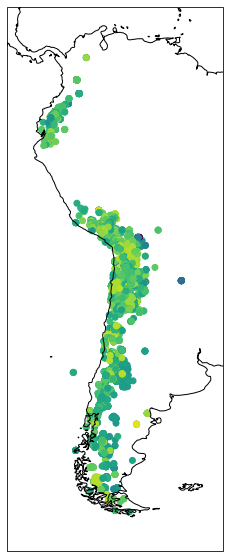

In [63]:
# Genera figura por diversión
# Mapa de los resultados
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax  = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([-85, -55, -60, 15])
#ax.stock_img()
ax.coastlines()
ax.scatter(lon, lat, c=SiO2)
plt.savefig('chap06_prob2.pdf')

### Ejercicio 3

Usando el ejemplo anterior, describa estadísticamente las características de $SiO_2$, $Al_2O_3$, $FeO_{total}$, $CaO$, $MgO$ (columnas 27, 30,34,35,36). Tenga en cuenta que hay valores vacíos, que no deben ser tenidos en cuenta en el cálculo. 


In [118]:
# prob_c5_3.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fin  = 'ANDEAN_ARC_1.csv'
fmt  = '%9.4f %9.4f %9.4f'

data = pd.read_csv(fin,usecols=[27,30,34,35,36])
# Option 1
Si  = np.array(data.iloc[:,0])
Al  = np.array(data.iloc[:,1])
Fe  = np.array(data.iloc[:,2])
Ca  = np.array(data.iloc[:,3])
Mg  = np.array(data.iloc[:,4])

# Promedios
Simn = np.nanmean(Si)
Almn = np.nanmean(Al)
Femn = np.nanmean(Fe)
Camn = np.nanmean(Ca)
Mgmn = np.nanmean(Mg)
#Desviaciones
Sistd = np.nanstd(Si)
Alstd = np.nanstd(Al)
Festd = np.nanstd(Fe)
Castd = np.nanstd(Ca)
Mgstd = np.nanstd(Mg)

print('Promedios')
print('    Si,     Al,     Fe,     Ca,     Mg, \n%7.3f %7.3f %7.3f %7.3f %7.3f' 
      %(Simn, Almn,Femn, Camn, Mgmn))
print('Desviación estandar')
print('    Si,     Al,     Fe,     Ca,     Mg, \n%7.3f %7.3f %7.3f %7.3f %7.3f' 
      %(Sistd, Alstd,Festd, Castd, Mgstd))


Promedios
    Si,     Al,     Fe,     Ca,     Mg, 
 60.116  15.808   5.573   5.462   3.490
Desviación estandar
    Si,     Al,     Fe,     Ca,     Mg, 
  8.359   2.401   3.108   3.154   3.760


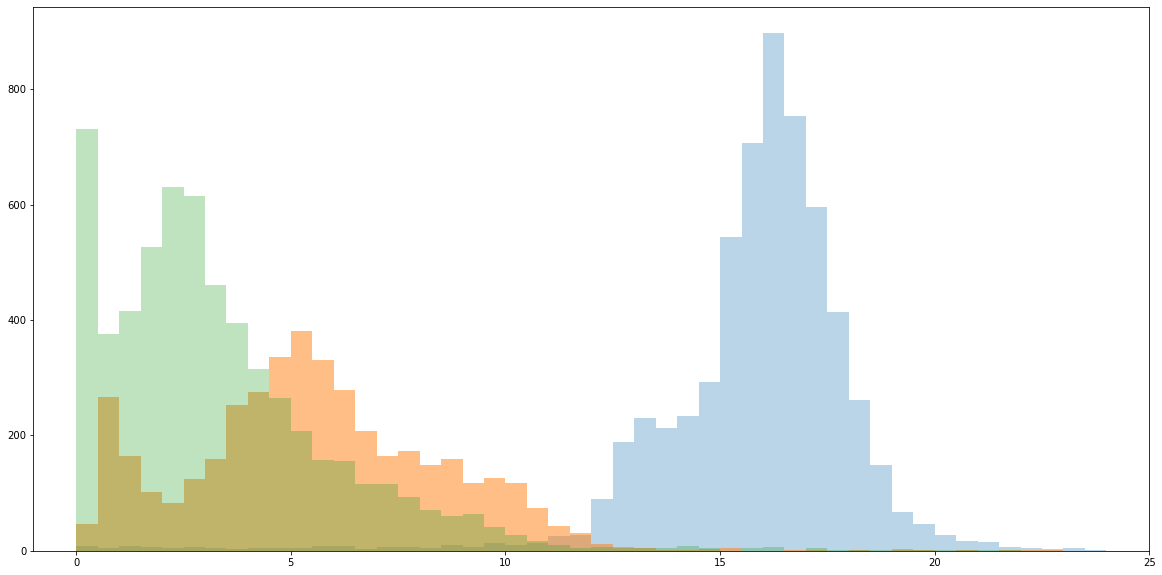

In [120]:
bins = np.arange(0,30,0.5)

fig = plt.figure(figsize=(20,10))
ax  = fig.add_subplot(1,1,1)
ax.hist(Al,bins=bins,alpha=0.3)
ax.hist(Fe,bins=bins,alpha=0.5)
ax.hist(Mg,bins=bins,alpha=0.3)
ax.set_xlim(-1,25)
plt.savefig('chap06_prob3.pdf')